In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sales = pd.read_excel('sales.xlsx')
sales.head(5)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


#### Line Chart 

C:\Users\Sathya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


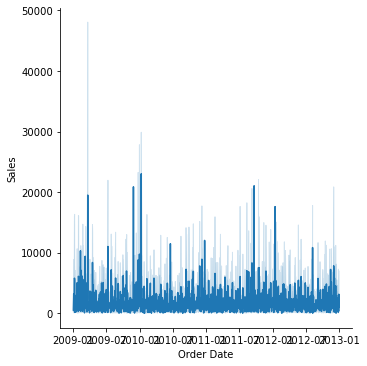

In [7]:
# Line chart syntax, along with relplot, parameter kind=line gives linechart
sns.relplot('Order Date','Sales',data=sales, kind='line')

In the above plot , the x value order date has too many values, so we extract only the year from the order date column

In [8]:
# Extracting year and assigning it to a new column
sales['year'] = sales['Order Date'].dt.year

In [9]:
sales['year'][:5]

0    2010
1    2012
2    2012
3    2011
4    2010
Name: year, dtype: int64

In [10]:
sales['year'].count()

8399

In [11]:
sales['year'].unique()

array([2010, 2012, 2011, 2009], dtype=int64)

C:\Users\Sathya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


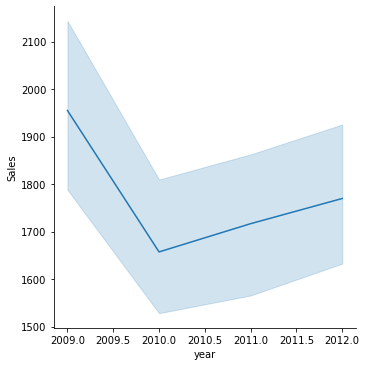

In [12]:
# now we plot a line plot forthe column year and Sales
sns.relplot('year','Sales',data=sales,kind='line')

In the above plot the line is the mean sales value and the shaded region represents the +/- 95% confidence interval
we can remove it with ci = None

C:\Users\Sathya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


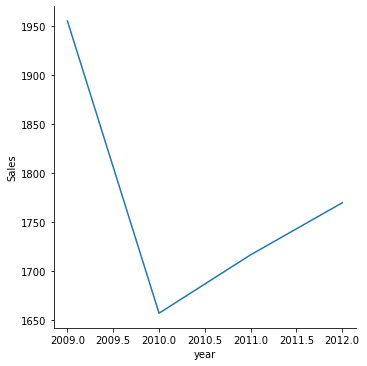

In [13]:
# line plot with ci = None
sns.relplot('year','Sales',data=sales,kind='line', ci=None)

C:\Users\Sathya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


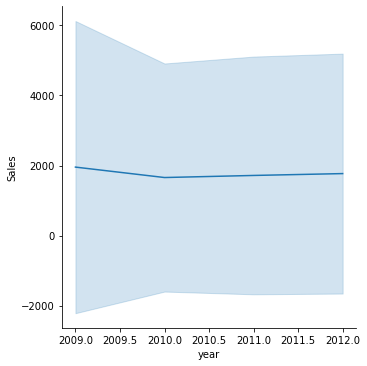

In [14]:
# ci = sd, standard deviation
sns.relplot('year','Sales',data=sales,kind='line', ci='sd')

C:\Users\Sathya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


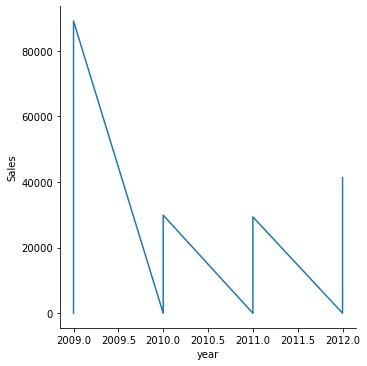

In [15]:
# To get exact values, use the parameter estimator = None
sns.relplot('year','Sales',data=sales,kind='line',estimator=None)

C:\Users\Sathya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


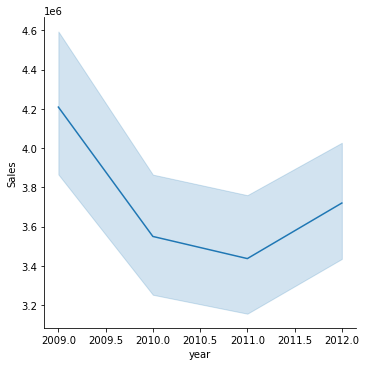

In [16]:
# To get sum of all values
sns.relplot('year','Sales',data=sales,kind='line',estimator=sum)

C:\Users\Sathya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


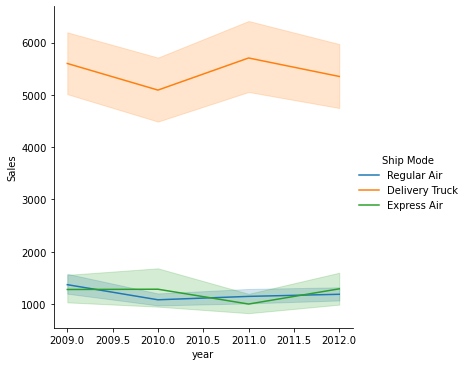

In [17]:
# Giving the parameter hue, to know the Sales individually for the variable in hue
sns.relplot('year','Sales',data=sales,kind='line', hue='Ship Mode')


The graph shows that sales with truck is much more than with air

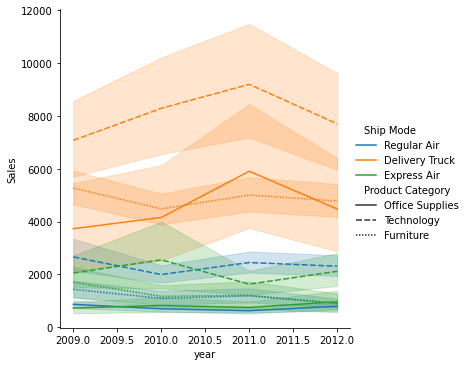

In [19]:
# To further split the graph within each hue, we can use the style parameter,(in the same color, the line patterns are diff)

sns.relplot('year','Sales',data=sales,kind='line',hue='Ship Mode', style='Product Category')

C:\Users\Sathya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


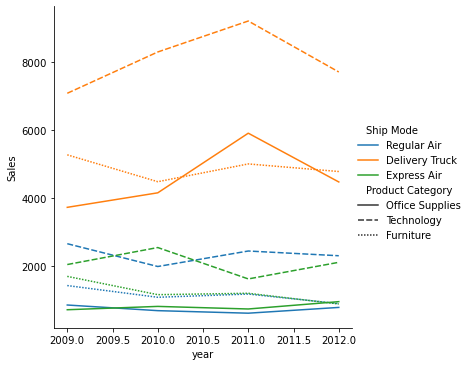

In [20]:
# To remove shades use ci= None
sns.relplot('year','Sales',data=sales,kind='line',hue='Ship Mode', style='Product Category', ci=None)

#### For separate chart for column values use parameter col

C:\Users\Sathya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


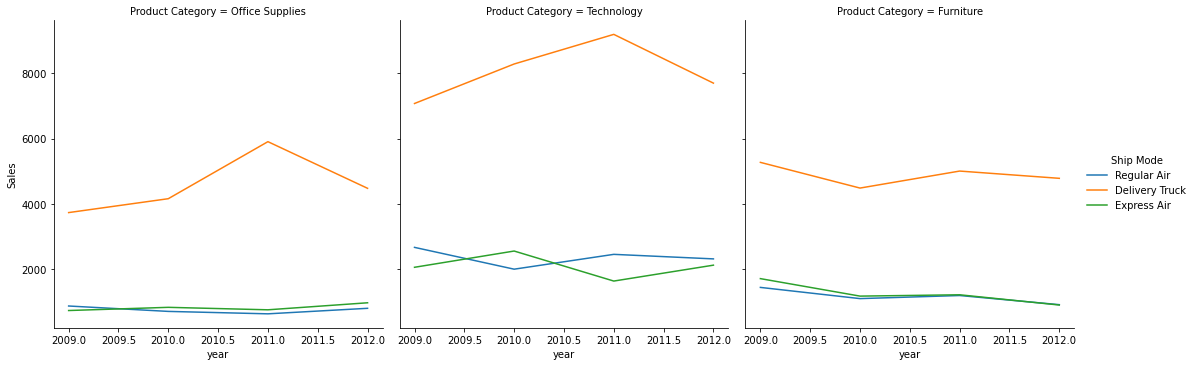

In [21]:
# In the above plot , there are three distinct values for procuct category, instead of style it can fall under col parameter
sns.relplot('year','Sales',data=sales,kind='line',hue='Ship Mode', col='Product Category',ci=None)

In [22]:
# we try with other column region
sales['Region'].value_counts()

West                     1991
Ontario                  1826
Prarie                   1706
Atlantic                 1080
Quebec                    781
Yukon                     542
Northwest Territories     394
Nunavut                    79
Name: Region, dtype: int64

C:\Users\Sathya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


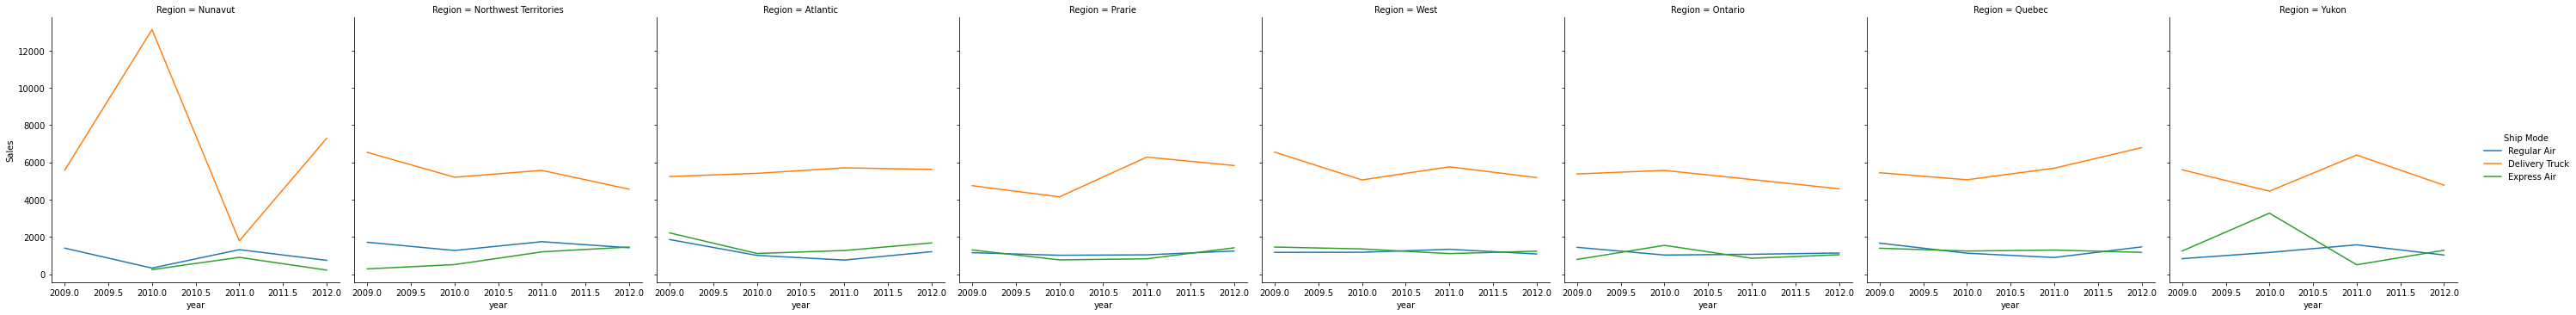

In [23]:
# using col parameter for Region.
sns.relplot('year','Sales',data=sales,kind='line',hue='Ship Mode', col='Region',ci=None)

C:\Users\Sathya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


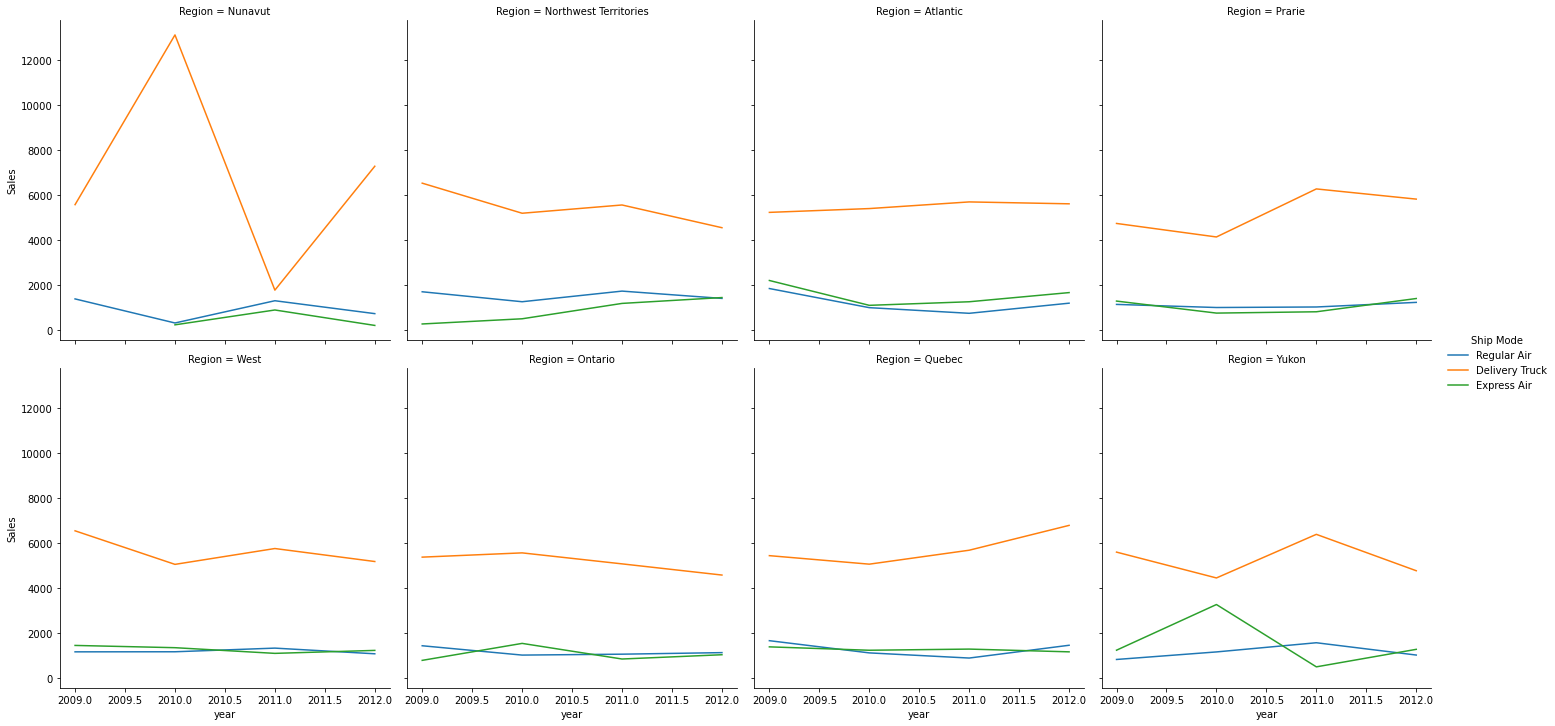

In [24]:
# To mke this graph better, use col_wrap = 4, implies there can be only 4 plots in a row
sns.relplot('year','Sales',data=sales,kind='line',hue='Ship Mode', col='Region',col_wrap= 4, ci=None)

# total 8 regions, so two rows with 4 region each
